# Molecular Dynamics Project


## 1  Introduction

### a) Understanding the potential

#### i) 

Program som plotter potetialet:

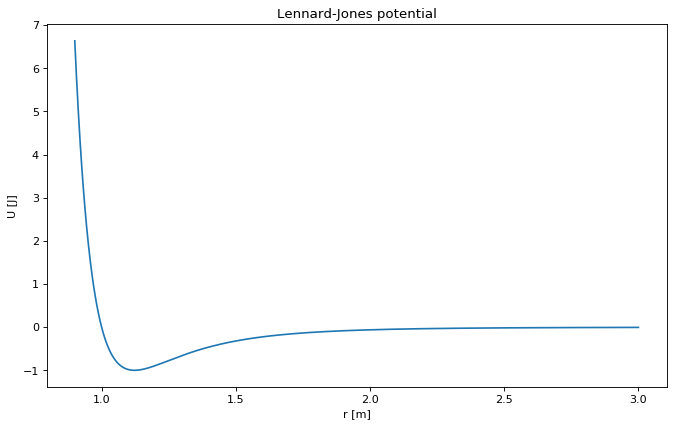

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def U(r, ε, σ):
	return 4*ε*((σ/r)**12 - (σ/r)**6)

r_ray = np.linspace(0.9, 3, 1000)
U_ray = U(r_ray, 1, 1)

plt.figure(figsize=(10, 6), dpi=80)
plt.plot(r_ray, U_ray)
plt.title("Lennard-Jones potential")
plt.xlabel("r [m]")
plt.ylabel("U [J]")
plt.show()

#### ii)

Når $r < \sigma$ er $\frac{\sigma}{r} > 1$, så $(\frac{\sigma}{r})^{12}$ dominerer, mens hvis $r > \sigma$ så er $\frac{\sigma}{r} < 1$, og $(\frac{\sigma}{r})^{6}$ blir relativt mye større enn $(\frac{\sigma}{r})^{12}$. Dette fører til at grafen vokser sterk når $r < \sigma$, og synker når $r > \sigma$.

#### iii)

Når $r$ går mot $0$ går $U$ mot $\infty$, når $r$ går mot $\sigma$ går $U$ mot $0$, når $r$ går mot $\sqrt[6]{2}$ har $U$ et bunnpunkt, og når $r$ blir stor går $U$ mot $0$.

#### iv)

Hvis vi har to atomer med en avstand på 1.5σ blir U et negativt tall, så de vil bli tiltrukket til hverandre. Etter hvert vil r bli så lavt at U blir et positivt tall, og de vlil frastøte hverandre. Ettersom total energi er bevart bør ikke atomene stoppe opp, så de vil veksle rundt likevektspunktet i evig tid. Hvis de starter med en avstand på 0.95σ vil de starte med å frastøte hverandre, før de vil tiltrekke hverande og igjen gå frem og tilbake i evig tid.

#### v)

Rett til venste for likevektspunktet er kraften positiv, mens til høyre for likevektspunktet er kraften negativ. Kan jeg tenke på andre krefter med lignende oppførsel?

### b) Forces and equations of motion

#### i)

Vi har to atomer, $i$ og $j$. Disse atomene har positioner $\vec{r}_i$ og $\vec{r}_j$.
Avstanden mellom atomene blir da $r = |\vec{r}_i - \vec{r}_j|$. \
For å gjøre om potensialet til en kraft har man formelen $F(r) = -\frac{dU}{dr}$. \
Deriverer med wolfram alpha:
$$\frac{dU}{dr} = 24\varepsilon\left(\left(\frac{\sigma}{r}\right)^6 - 2\left(\frac{\sigma}{r}\right)^{12}\right)\frac{1}{r}$$
$$ $$
Setter så inn formelen til $r = |\vec{r}_i - \vec{r}_j|$ for å få kraften på atom $i$ fra atom $j$:
$$ $$
$$F = -24\varepsilon\left(\left(\frac{\sigma}{|\vec{r}_i - \vec{r}_j|}\right)^6 - 2\left(\frac{\sigma}{|\vec{r}_i - \vec{r}_j|}\right)^{12}\right)\frac{1}{|\vec{r}_i - \vec{r}_j|}$$

#### ii)

For å finne en formel for bevegelsen til atom $i$ må vi først gjøre om kraften vi fant i forigje deloppgave til en kraftvektor. Dette er enkelt, ettersom kraften på atom $i$ fra atom $j$ peker mot $j$, altså er retningsvektoren $\frac{\vec{r}_i - \vec{r}_j}{|\vec{r}_i - \vec{r}_j|}$. Ganger vi dette med formelen for kraften, får vi det endelige uttrykket for kraftvektoren:
$$ $$
$$\vec{F} = F \cdot \frac{\vec{r}_i - \vec{r}_j}{|\vec{r}_i - \vec{r}_j|} 
= -24\varepsilon\left(\left(\frac{\sigma}{|\vec{r}_i - \vec{r}_j|}\right)^6 - 2\left(\frac{\sigma}{|\vec{r}_i - \vec{r}_j|}\right)^{12}\right)\frac{1}{|\vec{r}_i - \vec{r}_j|}\frac{\vec{r}_i - \vec{r}_j}{|\vec{r}_i - \vec{r}_j|} 
= 24\varepsilon\left(2\left(\frac{\sigma}{|\vec{r}_i - \vec{r}_j|}\right)^{12} - \left(\frac{\sigma}{|\vec{r}_i - \vec{r}_j|}\right)^6\right)\frac{\vec{r}_i - \vec{r}_j}{|\vec{r}_i - \vec{r}_j|^2}$$

Ettersom $\vec{F} = m\vec{a}$ får $i$ en akselerasjon på $\frac{\vec{F}}{m} = \frac{24\varepsilon}{m}\left(2\left(\frac{\sigma}{|\vec{r}_i - \vec{r}_j|}\right)^{12} - \left(\frac{\sigma}{|\vec{r}_i - \vec{r}_j|}\right)^6\right)\frac{\vec{r}_i - \vec{r}_j}{|\vec{r}_i - \vec{r}_j|^2}$. For å generalisere denne formelen til flere enn to atomer må vi summere over alle andre atomer, så formelen for bevegelse for atom $i$ er:
$$ $$
$$\frac{24\varepsilon}{m} \sum_{j \neq i} \left(2\left(\frac{\sigma}{|\vec{r}_i - \vec{r}_j|}\right)^{12} - \left(\frac{\sigma}{|\vec{r}_i - \vec{r}_j|}\right)^6\right)\frac{\vec{r}_i - \vec{r}_j}{|\vec{r}_i - \vec{r}_j|^2}$$

### c)    Units

#### i)

\begin{align}
    \vec{r}_i\,' = \vec{r}_i/\sigma &\implies \vec{r}_i = \vec{r}_i\,'\sigma \\
    &\implies |\vec{r}_i - \vec{r}_j| = |\vec{r}_i\,'\sigma - \vec{r}_i\,'\sigma| 
    = |\sigma(\vec{r}_i\,' - \vec{r}_i\,')| = \sigma|\vec{r}_i\,' - \vec{r}_i\,'| \text{ ( ettersom }\sigma\text{ er positiv)}
\end{align}
$$ $$
Bruker dette for å skrive likningen på skalert form:
$$ $$
\begin{align}
    \frac{d^2\vec{r}_i}{dt^2} =&
    \frac{24\varepsilon}{m} \sum_{j \neq i} \left(
        2\left(
            \frac{\sigma}{|\vec{r}_i - \vec{r}_j|}
        \right)^{12} - \left(
            \frac{\sigma}{|\vec{r}_i - \vec{r}_j|}
        \right)^6
    \right)\frac{\vec{r}_i - \vec{r}_j}{|\vec{r}_i - \vec{r}_j|^2} \\
    \frac{d^2\vec{r}_i\,'\sigma}{dt^2} =&
    \frac{24\varepsilon}{m} \sum_{j \neq i} \left(
        2\left(
            \frac{\sigma}{\sigma|\vec{r}_i\,' - \vec{r}_i\,'|}
        \right)^{12} - \left(
            \frac{\sigma}{\sigma|\vec{r}_i\,' - \vec{r}_i\,'|}
        \right)^6
    \right)\frac{\sigma(\vec{r}_i\,' - \vec{r}_i\,')}{\sigma^2|\vec{r}_i\,' - \vec{r}_i\,'|^2} \\
    \frac{d^2\vec{r}_i\,'\sigma}{dt^2} =&
    \frac{24\varepsilon}{m} \sum_{j \neq i} \left(
        2\left(
            \frac{1}{|\vec{r}_i\,' - \vec{r}_i\,'|}
        \right)^{12} - \left(
            \frac{1}{|\vec{r}_i\,' - \vec{r}_i\,'|}
        \right)^6
    \right)\frac{\vec{r}_i\,' - \vec{r}_i\,'}{\sigma|\vec{r}_i\,' - \vec{r}_i\,'|^2} \\
    \frac{d^2\vec{r}_i\,'}{dt^2} =&
    \frac{24\varepsilon}{m\sigma^2} \sum_{j \neq i} \left(
        2|\vec{r}_i\,' - \vec{r}_i\,'|^{-12} 
       - |\vec{r}_i\,' - \vec{r}_i\,'|^{-6}
    \right)\frac{\vec{r}_i\,' - \vec{r}_i\,'}{|\vec{r}_i\,' - \vec{r}_i\,'|^2}
\end{align}

Innfører $t' = t/\tau$:
\begin{align}
    \frac{d^2\vec{r}_i\,'}{dt^2} =&
    \frac{24\varepsilon}{m\sigma^2} \sum_{j \neq i} \left(
        2|\vec{r}_i\,' - \vec{r}_i\,'|^{-12} 
       - |\vec{r}_i\,' - \vec{r}_i\,'|^{-6}
    \right)\frac{\vec{r}_i\,' - \vec{r}_i\,'}{|\vec{r}_i\,' - \vec{r}_i\,'|^2} \\
    \frac{d^2\vec{r}_i\,'}{dt'^2\tau^2} =&
    \frac{24\varepsilon}{m\sigma^2} \sum_{j \neq i} \left(
        2|\vec{r}_i\,' - \vec{r}_i\,'|^{-12} 
       - |\vec{r}_i\,' - \vec{r}_i\,'|^{-6}
    \right)\frac{\vec{r}_i\,' - \vec{r}_i\,'}{|\vec{r}_i\,' - \vec{r}_i\,'|^2} \\
    \frac{d^2\vec{r}_i\,'}{dt'^2} =&
    24\tau^2\frac{\varepsilon}{m\sigma^2} \sum_{j \neq i} \left(
        2|\vec{r}_i\,' - \vec{r}_i\,'|^{-12} 
       - |\vec{r}_i\,' - \vec{r}_i\,'|^{-6}
    \right)\frac{\vec{r}_i\,' - \vec{r}_i\,'}{|\vec{r}_i\,' - \vec{r}_i\,'|^2} \\
\end{align}

For å forenkle uttrykket kan vi fjærne $\frac{\varepsilon}{m\sigma^2}$ ved å velge en $\tau$ slik at
$\tau^2 \cdot \frac{\varepsilon}{m\sigma^2} = 1$:
$$ $$
\begin{align}
    &\tau^2 \cdot \frac{\varepsilon}{m\sigma^2} = 1 \\
    &\tau^2 = \frac{m\sigma^2}{\varepsilon} \\
    &\tau = \sqrt{\frac{m\sigma^2}{\varepsilon}}
\end{align}

Hvis vi putter dette inn i likningen får vi vår skalerte likning:
$$ $$
\begin{align}
    \frac{d^2\vec{r}_i\,'}{dt'^2} =&
    24\tau^2\frac{\varepsilon}{m\sigma^2} \sum_{j \neq i} \left(
        2|\vec{r}_i\,' - \vec{r}_i\,'|^{-12} 
       - |\vec{r}_i\,' - \vec{r}_i\,'|^{-6}
    \right)\frac{\vec{r}_i\,' - \vec{r}_i\,'}{|\vec{r}_i\,' - \vec{r}_i\,'|^2} \\
    \frac{d^2\vec{r}_i\,'}{dt'^2} =&
    24 \sum_{j \neq i} \left(
        2|\vec{r}_i\,' - \vec{r}_i\,'|^{-12} 
       - |\vec{r}_i\,' - \vec{r}_i\,'|^{-6}
    \right)\frac{\vec{r}_i\,' - \vec{r}_i\,'}{|\vec{r}_i\,' - \vec{r}_i\,'|^2}
\end{align}

#### ii)

Den karakteristiske tidsskalaen $\tau$ for argon er:
\begin{align}
    \tau &= \sqrt{\frac{m\sigma^2}{\varepsilon}} \\
    & = \sqrt{\frac{39.95 \text{u} \cdot 3.405^2 \text{ Å}^2}{1.0318·10−2 \text{ eV}}} \\
    & = \sqrt{\frac{(39.95 \cdot 1.66 \cdot 10^{-27})\ \text{kg} \cdot (3.405 \cdot 1 \cdot 10^{-10})^2\ \text{m}^2}
        {(1.0318 \cdot 10^{−2} \cdot 1.602 \cdot 10^{-19})\ \text{J}}
        } \\
    & = 2.16 \cdot 10^{-12} \text{ s}
\end{align}
Som er 2.16 picosekunder. \
Enheten til $\tau$ er $\sqrt{\frac{\text{kgm}^2}{\text{J}}} = \sqrt{\frac{\text{kgm}^2}{\text{kgm}^2/\text{s}^2}} = \sqrt{\text{s}^2} = \text{s}$, som gir mening.


## 2 Two-atom simulations

### a) Implementation

#### i)

Skrev et program:

In [2]:
import itertools
from functools import reduce
import matplotlib.pyplot as plt
from vector import Vector3

class Atom:
	def __init__(self, pos, vel=None):
		self.force = Vector3()
		self.acc = Vector3()
		if vel is None:
			self.vel = Vector3()
		self.pos = pos

	def update(self, dt, func="chromer"):
		if func == "chromer":
			self.update_chromer(dt)
		elif func == "euler":
			self.update_euler(dt)
		elif func == "verlet":
			self.update_verlet(dt)
		else:
			print(">:[")

	def update_euler(self, dt):
		"""
		r[i+1] = r[i] + v[i]*dt
		v[i+1] = v[i] + a[i]*dt
		"""
		acc = self.force
		self.pos += self.vel*dt
		self.vel += acc*dt
		self.force.set(0, 0, 0)

	def update_chromer(self, dt):
		"""
		v[i+1] = v[i] + a[i]*dt
		r[i+1] = r[i] + v[i+1]*dt
		"""
		acc = self.force
		self.vel += acc*dt
		self.pos += self.vel*dt
		self.force.set(0, 0, 0)

	def update_verlet(self, dt):
		"""
		v[i] = v[i-1] + 0.5*(a[i-1] + a[i])*dt
		r[i+1] = v[i]*dt + 0.5*a[i]*dt^2
		"""
		acc_prev = self.acc
		acc = self.force.copy()
		self.vel += 0.5*(acc_prev + acc)*dt
		self.pos += self.vel*dt + 0.5*acc*dt**2
		self.acc = acc
		self.force.set(0, 0, 0)

	def length_to(self, atom):
		return (self.pos - atom.pos).length

	def copy(self):
		return Atom(self.pos.copy())

	def __repr__(self):
		return str(self.pos)

def get_force(atom1, atom2):
	between_vec = atom1.pos - atom2.pos
	r_sqrd = between_vec.get_length_sqrd()

	direction_vec = between_vec/r_sqrd
	force = 24*(2*r_sqrd**-6 - r_sqrd**-3)

	return direction_vec*force

def step(atoms, dt, update_func):
	# Add the force acting on the particles efficiently using pairs
	for atom1, atom2 in itertools.combinations(atoms, 2):
		force = get_force(atom1, atom2)
		atom1.force += force
		atom2.force -= force

	# Update the atoms position using given method
	for atom in atoms:
		atom.update(dt, update_func)

def simulate(atoms, dt, t_max, update_func):
	t_list = [0]
	r_list = []

	while t_list[-1] < t_max:
		r_list.append(atoms[0].length_to(atoms[1]))
		step(atoms, dt, update_func)
		t_list.append(t_list[-1] + dt)
        
	return t_list[:-1], r_list

Programmet jeg har skrevet er objekt-orientert, jeg har brukt atom-objekter og looper gjennom en liste med disse objektene. Dette føler jeg er mye mer leselig, og gir mer intuitiv mening, enn hvis man bare hadde positioner i et stort array. Det er likevel slik at dette gjør programmet litt treigere, men det kan fikses hvis det blir nødvendig. \
Jeg bruker itertools.combinations, som gir hver unike kombinasjon av atomer som en iterator, sammen med newtons 3. lov for å gjøre programmet mer effektivt. \
Jeg har også endret kraft-funksjonen litt. Jeg bruker $r_{sqrd} = |\vec{r}_i\,' - \vec{r}_i\,'|^2$ istedenfor $r = |\vec{r}_i\,' - \vec{r}_i\,'|$, ettersom dette unngår å finne kvadratroten av mange tall, som er relativt treigt. Det gjør at formelen for kraft mellom to atomer blir $\left(2\left(r_{sqrd}\right)^{-6} - \left(r_{sqrd}\right)^{-3} \right)\frac{\vec{r}_i\,' - \vec{r}_i\,'}{r_{sqrd}}$.

### b) Motion

#### i) og ii)

Skrev et program som bruker simulate-funksjonen for å plotte atomer gitt en startavstand:

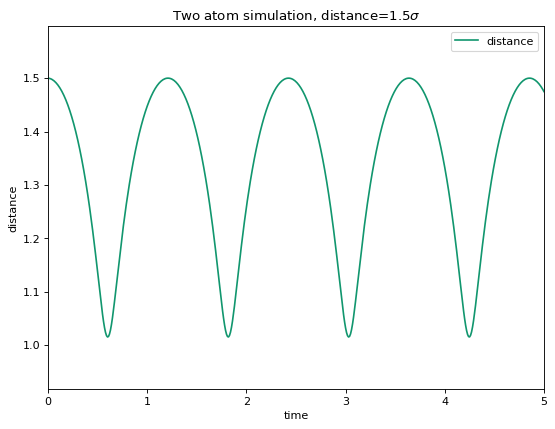

In [3]:
def main(distance):
	dt = 0.01
	length = 5
    
	atoms = [
		Atom(Vector3(0, 0, 0)),
		Atom(Vector3(distance, 0, 0))
	]
    
	t_list, r_list = simulate(atoms, dt, length, "chromer")
	plt.figure(figsize=(8, 6), dpi=80)
	plt.plot(t_list, r_list, color="#11966e", label="distance")
	plt.legend()

	min_r, max_r = min(r_list), max(r_list)
	padding = (max_r-min_r)/5
	plt.axis([0, length, min_r-padding, max_r+padding])
    
	plt.title(f"Two atom simulation, distance={distance}$\\sigma$")
	plt.xlabel("time")
	plt.ylabel("distance")
	plt.show()
main(1.5)

#### iii)

Bevegelsen er som forventet, kulene tiltrekker hverandre helt fram til avstanden nærmer seg $\sigma$, og så frastøter de hverandre. Den totale energien er bevart, så denne bevegelsen vil fortsette i all evighet.

#### iv)

Kjører main med avstanden 0.95:

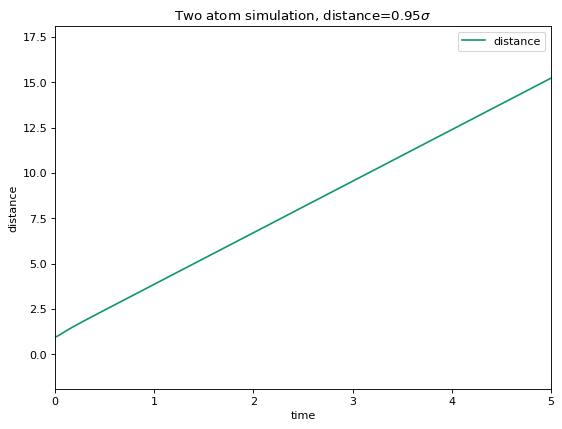

In [4]:
main(0.95)

Her flyr atomene fra hverandre ettersom den potensielle energien kom over 0.

### c) Energy

#### i)

Den kinetiske energien til systemet er er $E_k = \sum\limits_{i=0}^N \frac{1}{2}m_iv_i^2$, den potensielle energien er $E_p = \sum\limits_{i=0}^N \sum\limits_{j=i}^N U(r_i)$, og den totale energien er $E = E_k + E_p$. \
Jeg bruker ikke to for-løkker for å kalkulere potensialet, men heller itertools.combinations igjen. Endret på programmet slik at det lagrer de ulike energiformene og plotter disse verdiene:

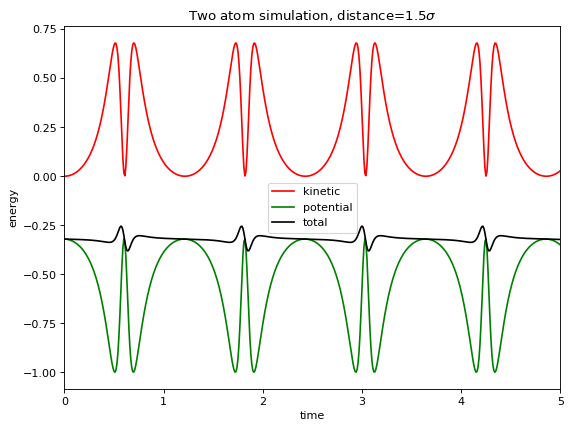

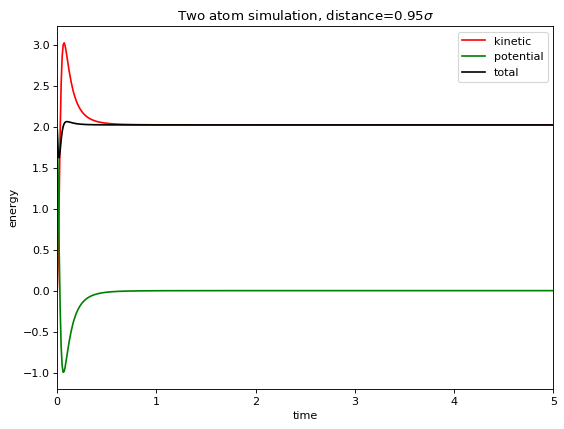

In [5]:
def U(r_sqrd):
	return 4*(r_sqrd**-6 - r_sqrd**-3)

def get_energy(atoms):
	# Calculate potential energy:
	potential_energy = 0
	for atom1, atom2 in itertools.combinations(atoms, 2):
		between_vec = atom1.pos - atom2.pos
		potential_energy += U(between_vec.get_length_sqrd())

	# Calculate kinetic energy:
	kinetic_energy = reduce(lambda accumelator, atom: accumelator + 0.5*atom.vel.get_length_sqrd(), atoms, 0)

	return potential_energy, kinetic_energy, potential_energy+kinetic_energy

def simulate(atoms, dt, t_max, update_func):
	t_list = [0]
	kin_list, pot_list, tot_list = ([] for i in range(3))

	while t_list[-1] < t_max:
		pot, kin, tot = get_energy(atoms)

		kin_list.append(kin)
		pot_list.append(pot)
		tot_list.append(tot)

		step(atoms, dt, update_func)
		t_list.append(t_list[-1] + dt)

	return t_list[:-1], kin_list, pot_list, tot_list

def main(distance):
	dt = 0.01
	length = 5

	atoms = [
		Atom(Vector3(0, 0, 0)),
		Atom(Vector3(distance, 0, 0))
	]

	t_list, kin_list, pot_list, tot_list = simulate(atoms, dt, length, "chromer")
	data_list = [
		("kinetic", "r", kin_list),
		("potential", "g", pot_list),
		("total", "k", tot_list),
	]
    
	plt.figure(figsize=(8, 6), dpi=80)
    
	for name, color, values in data_list:
		plt.plot(t_list, values, color=color, label=name)
	plt.legend()

	min_value = min(pot_list)
	max_value = max(kin_list)
	buffer = (max_value - min_value)/20
	plt.axis([0, length, min_value-buffer, max_value+buffer])
	plt.title(f"Two atom simulation, distance={distance}$\\sigma$")
	plt.xlabel("time")
	plt.ylabel("energy")
	plt.show()
main(1.5)
main(0.95)

#### ii)

Den totale energien bør bevares, energien til atomene går ikke over til noen andre former (det er ikke noe luftmotstand eller liknende), og ettersom energi ikke kan forsvinne må den bevares.

### iii)

Programmet mitt gjør ikke dette med en dt på 0.01, men med lavere verdier er den totale energien konstant. Nyaktig hva som går galt med for høy dt vet jeg ikke, men det er ikke uvanlig at høy dt fører til små unyaktigheter.

### iv)

Ender på main slik at den tar inn en differensliallikningsløsningsmetode, og kjører den med Euler, Euler Chromer og Velocity Verlet:

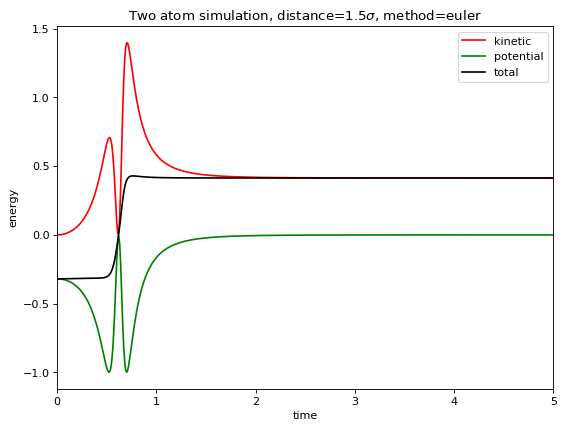

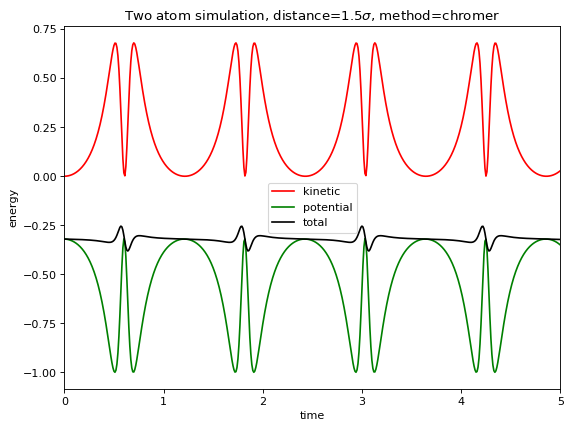

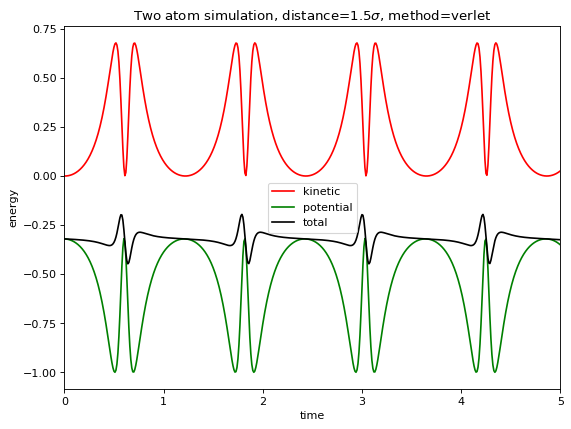

In [6]:
def main(method):
	dt = 0.01
	length = 5
    
	atoms = [
		Atom(Vector3(0, 0, 0)),
		Atom(Vector3(1.5, 0, 0))
	]
    
	t_list, kin_list, pot_list, tot_list = simulate(atoms, dt, length, method)
	data_list = [
		("kinetic", "r", kin_list),
		("potential", "g", pot_list),
		("total", "k", tot_list),
	]
    
	plt.figure(figsize=(8, 6), dpi=80)

	for name, color, values in data_list:
		plt.plot(t_list, values, color=color, label=name)
	plt.legend()
	min_value = min(pot_list)
	max_value = max(kin_list)
	buffer = (max_value - min_value)/20
	plt.axis([0, length, min_value-buffer, max_value+buffer])
	plt.title(f"Two atom simulation, distance=1.5$\\sigma$, method={method}")
	plt.xlabel("time")
	plt.ylabel("energy")
	plt.show()
main("euler")
main("chromer")
main("verlet")

Eulers metode er helt på bærtur, Euler Chromer er best, og velocity verlet er ganske grei.

### v)

Endret igjen på main, la til en for-løkke som plotter med flere dt-verdier:

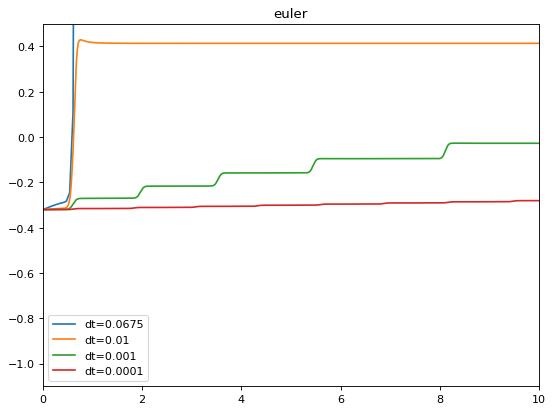

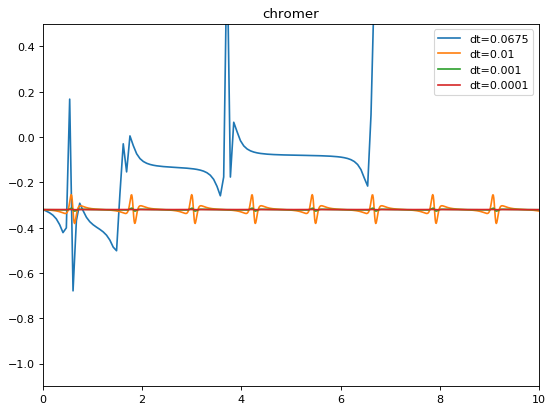

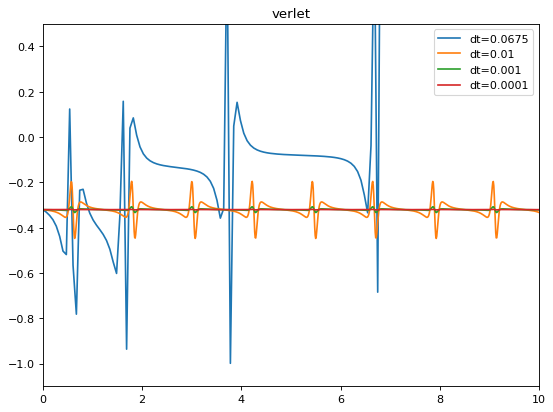

In [7]:
def main(method):
	length = 10

	atoms = [
		Atom(Vector3(0, 0, 0)),
		Atom(Vector3(1.5, 0, 0))
	]

	plt.figure(figsize=(8, 6), dpi=80)
	tot_lists = []
	for i, dt in enumerate([0.0675, 0.01, 0.001, 0.0001]):
		t_list, kin_list, pot_list, tot_list = simulate([atom.copy() for atom in atoms], dt, length, method)
		tot_lists.append(tot_list)
		plt.plot(t_list, tot_list, label=f"dt={dt}")

	plt.legend()
	plt.title(method)
	plt.axis([0, length, -1.1, 0.5])
	plt.show()
main("euler")
main("chromer")
main("verlet")

Euler er det ikke mye håp for, selv med dt=0.0001 er den totale energien ikke konstant. Både Euler-Chromer og Velocity-Verlet går det bedre med, selv med dt=0.01 er den totale energien gjennomsnittlig konstant, den varierer, men variasjonen er periodisk og like stor i begge retninger. Ved dt=0.001 er denne variasjonen veldig lav, og ved dt=0.0001 er den totale energien så godt som konstant. Det vil si at det ikke egentlig finnes et største tidssteg hvor Euler konserverer energi, men med dt=0.0001 er feilen liten nok til at det ikke er så farlig, mens det største tidssteget som konserverer energi er 0.01 for både Euler-Chromer og Velocity-Verlet.

### vi)

Det virker som om Euler-Chromer er den beste av de tre numeriske metodene, både i nyaktighet og effektivitet. Euler er lett å regne ut for hvert tidssteg, men har lav nyaktighet, mens Euler-Chromer er like lett å regne ut, du bare bytter om rekkefølgen på fart og positon, mens nyaktigheten er mye høyere. Velocity-Verlet virker ca. like nyaktig som Euler-Chromer, men er mer krevende å regne ut, man må ta vare på forrige akselerasjon og gjøre noen ekstra utregninger. Euler-Chromer har altså bare fordeler og ingen ulemper.

### d)

#### i)

La til filskrivingslogikk, det vil si la funksjone save_state til atom-objektet, og gjorde at step-funksjonen kjører atom.save_state til en fil åpnet i simulate:

In [8]:
class Atom:
	def __init__(self, pos, vel=None):
		self.force = Vector3()
		self.acc = Vector3()
		if vel is None:
			self.vel = Vector3()
		self.pos = pos

	def update(self, dt, func="chromer"):
		if func == "chromer":
			self.update_chromer(dt)
		elif func == "euler":
			self.update_euler(dt)
		elif func == "verlet":
			self.update_verlet(dt)
		else:
			print(">:[")

	def update_euler(self, dt):
		"""
		r[i+1] = r[i] + v[i]*dt
		v[i+1] = v[i] + a[i]*dt
		"""
		acc = self.force
		self.pos += self.vel*dt
		self.vel += acc*dt
		self.force.set(0, 0, 0)

	def update_chromer(self, dt):
		"""
		v[i+1] = v[i] + a[i]*dt
		r[i+1] = r[i] + v[i+1]*dt
		"""
		acc = self.force
		self.vel += acc*dt
		self.pos += self.vel*dt
		self.force.set(0, 0, 0)

	def update_verlet(self, dt):
		"""
		v[i] = v[i-1] + 0.5*(a[i-1] + a[i])*dt
		r[i+1] = v[i]*dt + 0.5*a[i]*dt^2
		"""
		acc_prev = self.acc
		acc = self.force
		self.vel += 0.5*(acc_prev + acc)*dt
		self.pos += self.vel*dt + 0.5*acc*dt**2
		self.acc = acc
		self.force = Vector3()

	def save_state(self, file):                                          # N   W
		file.write(f"Ar {self.pos.x:f} {self.pos.y:f} {self.pos.z:f}\n") #   E

	def length_to(self, atom):
		return (self.pos - atom.pos).length

	def copy(self):
		return Atom(self.pos.copy())

	def __repr__(self):
		return str(self.pos)

    
def step(atoms, dt, update_func, datafile):
	# Add the force acting on the particles efficiently using pairs
	for atom1, atom2 in itertools.combinations(atoms, 2):
		force = get_force(atom1, atom2)
		atom1.force += force
		atom2.force -= force

	datafile.write(f"{len(atoms)}\ntype x y z\n")
	# Update the atoms position using given method
	for atom in atoms:
		atom.update(dt, update_func)
		atom.save_state(datafile)                                      # NEW


def simulate(atoms, dt, t_max, update_func, filename):
	t_list = [0]
	r_list = []

	datafile = open("data/"+filename, "w")                             # NEW

	while t_list[-1] < t_max:
		r_list.append(atoms[0].length_to(atoms[1]))
		step(atoms, dt, update_func, datafile)
		t_list.append(t_list[-1] + dt)

	datafile.close()                                                   # NEW
	return t_list[:-1], r_list

#### ii)

Nice

## 3 Large systems

### a) Implementation

#### i)

Løsningen fungerer allerede for N atomer og tar inn startposition og startfart 

#### ii)

Løsningen bruker allerede Newtons tredje lov for å halvere kraftkalkulasjoner

### iii)

Endret på kraftkalkulasjonen slik at den tar inn r_sqrd, ettersom den nå blir kalkulert i step for å gjøre at atomer med avstand større enn 3 ikke pårvirker hverandre. Endret også på get_energy slik at den potensielle energien ikke telles når avstanden er større enn 3. Jeg bruker fortsatt $r_{sqrd}$, så jeg tester heller om $r_{sqrd}$ er større enn 9:

In [9]:
def get_energy(atoms):
	# Calculate potential energy:
	potential_energy = 0
	for atom1, atom2 in itertools.combinations(atoms, 2):
		between_vec = atom1.pos - atom2.pos
		r_sqrd = between_vec.get_length_sqrd()
		if r_sqrd < 3*3:
			potential_energy += U(r_sqrd)
    
	# Calculate kinetic energy:
	kinetic_energy = reduce(lambda accumelator, atom: accumelator + 0.5*atom.vel.get_length_sqrd(), atoms, 0)

	return potential_energy, kinetic_energy, potential_energy+kinetic_energy

def get_energy(atoms):
	# Calculate potential energy:
	potential_energy = 0
	for atom1, atom2 in itertools.combinations(atoms, 2):
		between_vec = atom1.pos - atom2.pos
		potential_energy += U(between_vec.get_length_sqrd())

	# Calculate kinetic energy:
	kinetic_energy = reduce(lambda accumelator, atom: accumelator + 0.5*atom.vel.get_length_sqrd(), atoms, 0)

	return potential_energy, kinetic_energy, potential_energy+kinetic_energy


def get_force(between_vec, r_sqrd):
	direction_vec = between_vec/r_sqrd
	force = 24*(2*r_sqrd**-6 - r_sqrd**-3)

	return direction_vec*force

def step(atoms, dt, update_func, datafile):
	# Add the force acting on the particles efficiently using pairs
	for atom1, atom2 in itertools.combinations(atoms, 2):
		between_vec = atom1.pos - atom2.pos
		r_sqrd = between_vec.get_length_sqrd()

		if r_sqrd < 3*3:                                  # NEW
			force = get_force(between_vec, r_sqrd)
			atom1.force += force
			atom2.force -= force

	datafile.write(f"{len(atoms)}\ntype x y z\n")
	# Update the atoms position using given method
	for atom in atoms:
		atom.update(dt, update_func)
		atom.save_state(datafile)

#### iV)

Dette alene ødelegger energibevarelsen, så jeg må legge til en konstant til U. U(3) = $-\frac{2912}{531441}$, og det er bare å legge til -U(3) = $\frac{2912}{531441}$ til U. Plotter den nye potensialfunksjonen:

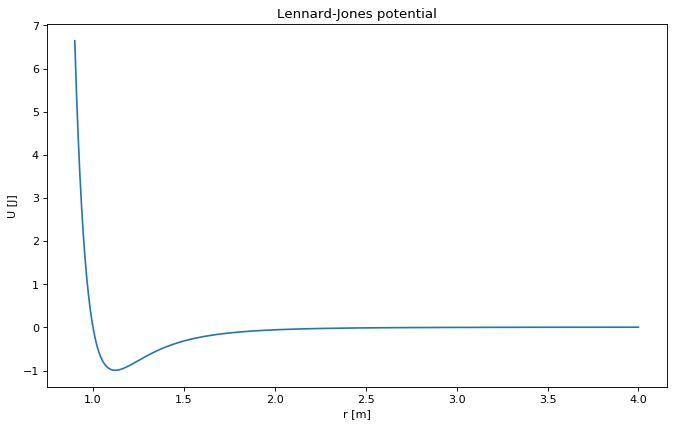

In [10]:
def U(r):
    return 4*(r**-12 - r**-6) + 2912/531441

r_ray = np.linspace(0.9, 4, 1000)
U_ray = U(r_ray)

plt.figure(figsize=(10, 6), dpi=80)
plt.plot(r_ray, U_ray)
plt.title("Lennard-Jones potential")
plt.xlabel("r [m]")
plt.ylabel("U [J]")
plt.show()

def U(r_sqrd):
	return 4*(r_sqrd**-6 - r_sqrd**-3)

#### v)

Ettersom kraften er den deriverte av potensialfunksjonen bør ikke dette gjøre noe forskjell

### b) Verification

#### i)

Jeg har ikke endret implementasjonen, så det er unødvendig å teste om den fortsatt virker.

#### ii)

Kjører main med en atoms-liste med de gitte positionene:

In [11]:
def main(filename):
	dt = 0.01
	length = 5
    
	atoms = [
		Atom(Vector3(1, 0, 0)),
		Atom(Vector3(0, 1, 0)),
		Atom(Vector3(-1, 0, 0)),
		Atom(Vector3(0, -1, 0))
	]
    
	simulate(atoms, dt, length, "verlet", filename)
main("data3b2.xyz")

#### iii)

Ettersom atomene er plassert i en firkant blir kraften fra de to nærmeste atomene lagt sammen til en kraft mot atomet som er lengst unna, så alle atomene beveger seg rett frem diagonalt mot atomet på den andre siden. Det er altså fortsatt en syklisk bevegelse.

#### iv)

Skrev en mer generisk energikalkulasjonskode og plottet energien i systemet:

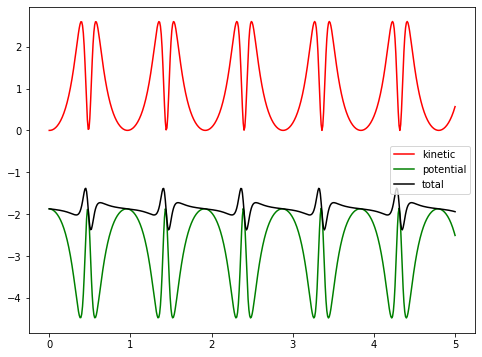

In [12]:
def simulate(atoms, dt, t_max, update_func, filename="data.xyz"):
	t_list = [0]
	pot_list = []
	kin_list = []
	tot_list = []

	datafile = open("data/"+filename, "w")

	while t_list[-1] < t_max:
		pot, kin, tot = get_energy(atoms)
		pot_list.append(pot)
		kin_list.append(kin)
		tot_list.append(tot)
        
		step(atoms, dt, update_func, datafile)
		t_list.append(t_list[-1] + dt)

	datafile.close()

	return t_list[:-1], pot_list, kin_list, tot_list

def main(filename, atoms):
	dt = 0.01
	length = 5
    
	t_list, pot_list, kin_list, tot_list = simulate(atoms, dt, length, "verlet", filename)
	data_list = [
		("kinetic", "r", kin_list),
		("potential", "g", pot_list),
		("total", "k", tot_list),
	]

	plt.figure(figsize=(8, 6))
	for name, color, values in data_list:
		plt.plot(t_list, values, color=color, label=name)
	plt.legend()
	plt.show()
    
atoms = [
		Atom(Vector3(1, 0, 0)),
		Atom(Vector3(0, 1, 0)),
		Atom(Vector3(-1, 0, 0)),
		Atom(Vector3(0, -1, 0))
	]

main("data3b2.xyz", atoms)

Den totale energien oppfører seg likt som forventet fra plottene i 2c, den totale energien er ikke konstant, men den er syklisk og feilen øker ikke over tid, så det er ikke et problem.

#### v)

Skjørte simuleringen med litt andre initialverdier:

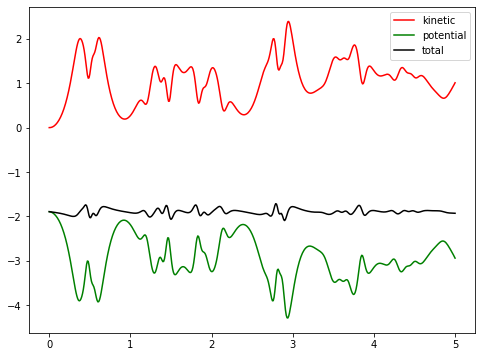

In [13]:
atoms = [
	Atom(Vector3(1, 0.1, 0)),
	Atom(Vector3(0, 1, 0)),
	Atom(Vector3(-1, 0, 0)),
	Atom(Vector3(0, -1, 0))
]

main("data3b5.xyz", atoms)

Selv om atomene startet med nesten samme positon som i ii førte den lille forstyrrelsen til at bevegelsen ble kaotisk veldig fort. \
Det er likevel slik at den totale energein er bevart, men energifiguren er mye mer rotete.

### c) Initialisation

#### i)

Skrev et program som returnerer atompositioner i en krystallstruktur:

In [14]:
def box_positions(n, L):
	d = L/n
	positions = []
	for i in range(0, n):
		for j in range(0, n):
			for k in range(0, n):
				positions.append(Vector3(   i   ,    j   ,   k    )*d)
				positions.append(Vector3(   i   , 0.5 + j, 0.5 + k)*d)
				positions.append(Vector3(0.5 + i,    j   , 0.5 + k)*d)
				positions.append(Vector3(0.5 + i, 0.5 + j,   k    )*d)
	return positions

#### ii)

Skrev et program som lagrer positionsverdiene i en xyz-fil:

In [15]:
positions = box_positions(3, 20)

with open("data/data3c2.xyz", "w") as outfile:
	outfile.write(f"{len(positions)}\ntype x y z\n")
	for position in positions:
		outfile.write(f"Ar {position.x:f} {position.y:f} {position.z:f}\n")

Det ser riktig ut

#### iii)

Volumet til krystallstrukturen er $L^3 = n^3d^3$, mengden atomer i krystallen er $4n^3$. Hvert atom har en masse m, så tettheten blir:
$$ $$
\begin{align*}
    p &= \frac{4n^3m}{n^3d^3} = \frac{4m}{d^3} \\
    \implies d &= \sqrt[\LARGE 3]{\frac{4m}{p}}
\end{align*}
$$ $$
Ettersom $m=39.95 u = 39.95\cdot1.66\cdot10^{-27} kg = 39.95\cdot1.66\cdot10^{-24}$ g, og $p=1.374$ g/cm$^3$, kan man finne p:
$$ $$
\begin{align*}
    d = \sqrt[\LARGE 3]{\frac{4\cdot39.95\cdot1.66\cdot10^{-24} \text{ g}}{1.374 \text{ g/cm}^3}} 
    = 5.78\cdot10^{-8}\text{ cm} = 5.78\cdot10^{-10}\text{ m}
\end{align*}
$$ $$
Vi er interesert i $d = x\sigma \implies x = \frac{d}{\sigma}$, hvor $\sigma = 3.405\cdot10^{-10} \text{m}$:
\begin{align*}
    x = \frac{5.78\cdot10^{-10} \text{ m}}{3.405\cdot10^{-10} \text{ m}} = 1.70 \; \square
\end{align*}

### d)

#### i)

Med 256 atomer begynner programmet å kjøre treigt. Måten jeg har håndtert dette er å bruke pypy, som er en just in time compiler for python er ca. 10 ganger raskere. Dette betyr at jeg ikke kommer til å kjøre programmet i jupyter, så jeg har lagt til at det lagrer energidata i en fil, og så har jeg et program som kan kjøre i jupyter som bare leser den filen og plotter resultatet.

In [16]:
import time

def simulate(atoms, dt, t_max, update_func, filename):
	# Declare variables
	t_list = [0]
	pot_list = []
	kin_list = []
	tot_list = []

	datafile = open("data/"+filename+".xyz", "w")

	start_time = time.time()
	while t_list[-1] < t_max:
		# Fancy progress indicator
		if int(t_list[-1]/dt) % t_max == 0:
			print(f"\r{t_list[-1]*100/t_max:.0f} %", end="")

		# Get and store energy
		pot, kin, tot = get_energy(atoms)
		pot_list.append(pot)
		kin_list.append(kin)
		tot_list.append(tot)

		step(atoms, dt, update_func, datafile)
		t_list.append(t_list[-1] + dt)
        
	# Print total elapsed time
	print(f"\n{update_func:>7}: {time.time()- start_time:.3g} s")

	datafile.close()

	return t_list[:-1], pot_list, kin_list, tot_list

def box_positions(n, d):
	positions = []
	for i in range(0, n):
		for j in range(0, n):
			for k in range(0, n):
				positions.append(Vector3(   i   ,    j   ,   k    )*d)
				positions.append(Vector3(   i   , 0.5 + j, 0.5 + k)*d)
				positions.append(Vector3(0.5 + i,    j   , 0.5 + k)*d)
				positions.append(Vector3(0.5 + i, 0.5 + j,   k    )*d)
	return positions
    
def main(filename):
	dt = 0.01
	length = 5
    
	atoms = []
	for position in box_positions(4, 1.7):
		atoms.append(Atom(position))
    
	t_list, pot_list, kin_list, tot_list = simulate(atoms, dt, length, "verlet", filename)
	with open("data/"+filename+".energy", "w") as outfile:
		for t, pot, kin, tot in zip(t_list, pot_list, kin_list, tot_list):
			outfile.write(f"{t} {pot} {kin} {tot}\n")
# main("data3di")

#### ii)

Programmet som leser energi data og plotter det:

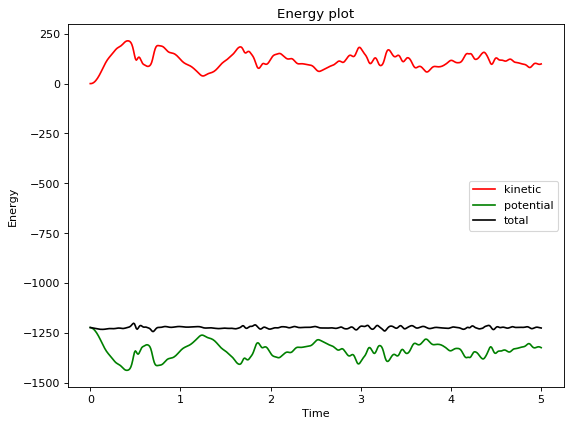

In [17]:
def plot_energy(energy_file):
    t_list, pot_list, kin_list, tot_list = [[] for i in range(4)]
    with open("data/"+energy_file, "r") as infile:
        for line in infile:
            t, pot, kin, tot = (float(v) for v in line.split())
            t_list.append(t)
            pot_list.append(pot)
            kin_list.append(kin)
            tot_list.append(tot)

    data_list = [
        ("kinetic", "r", kin_list),
        ("potential", "g", pot_list),
        ("total", "k", tot_list),
    ]
    plt.figure(figsize=(8, 6), dpi=80)
    for name, color, values in data_list:
        plt.plot(t_list, values, color=color, label=name)
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Energy")
    plt.title("Energy plot")
    plt.show()
plot_energy("data3di.energy")

Hovedforskjellen jeg kan se her er at den potensielle energien er mye lavere og mer kaotisk. Det er likevel slik at den totale energien er bevart.

### e) Boundary conditions

#### i)

Lagde en funksjon som implementerer periodisk grensetilstandshåndtering, og la til i Atom objektet at atomene teleporterer seg til motsatte side hvis de forlater boksen. Endret også step og get_energy funksjonene slik at de bruker den nye funksjonen, og gjorde at lengden L blir sendt til funksjonene som trenger den. Gir atomene en fart med x, y, z mellom -1 og 1. Bruker random.seed(1) slik at resultatene blir like hver gang programmet kjøres.

In [18]:
import random

def periodic_boundry(between_vec, L):
	dx = between_vec.x
	dx = dx - round(dx/L)*L
	dy = between_vec.y
	dy = dy - round(dy/L)*L
	dz = between_vec.z
	dz = dz - round(dz/L)*L

	direction_vec = Vector3(dx, dy, dz)
	r_sqrd = dx**2 + dy**2 + dz**2

	return direction_vec, r_sqrd

def get_energy(atoms, L):
	# Calculate potential energy:
	potential_energy = 0
	for atom1, atom2 in itertools.combinations(atoms, 2):
		between_vec = atom1.pos - atom2.pos
		direction_vec, r_sqrd = periodic_boundry(between_vec, L)
		if r_sqrd < 3*3:
			potential_energy += U(r_sqrd)

	# Calculate kinetic energy:
	kinetic_energy = reduce(lambda accumelator, atom: accumelator + 0.5*atom.vel.get_length_sqrd(), atoms, 0)

	return potential_energy, kinetic_energy, potential_energy+kinetic_energy

def step(atoms, dt, update_func, L, datafile):
	# Add the force acting on the particles efficiently using pairs
	for atom1, atom2 in itertools.combinations(atoms, 2):
		between_vec = atom1.pos - atom2.pos
		direction_vec, r_sqrd = periodic_boundry(between_vec, L)

		if r_sqrd < 3*3:
			force = get_force(direction_vec, r_sqrd)
			atom1.force += force
			atom2.force -= force

	datafile.write(f"{len(atoms)}\ntype x y z\n")
	# Update the atoms position using given method
	for atom in atoms:
		atom.update(dt, update_func)
		atom.save_state(datafile)
        
def simulate(atoms, dt, t_max, update_func, L):
	# Declare variables and save atoms
	t_list = [0]
	pot_list = []
	kin_list = []
	tot_list = []
	start_atoms = deep_copy(atoms)

	datafile = open("data/"+filename+".xyz", "w")

	start_time = time.time()
	while t_list[-1] < t_max:
		# Fancy progress indicator
		if int(t_list[-1]/dt) % t_max == 0:
			print(f"\r{t_list[-1]*100/t_max:.0f} %", end="")

		# Get and store energy
		pot, kin, tot = get_energy(atoms, L)
		pot_list.append(pot)
		kin_list.append(kin)
		tot_list.append(tot)

		step(atoms, dt, update_func, L, datafile)
		t_list.append(t_list[-1] + dt)

	# Print total elapsed time
	print(f"\n{update_func:>7}: {time.time()- start_time:.3g} s")

	# Save final atom positions
	for atom in atoms:
		atom.save_state(datafile)

	datafile.close()

	atoms = start_atoms
	return t_list[:-1], pot_list, kin_list, tot_list

def create_atoms(atom_count, d):
	n = int((atom_count/4)**(1/3))
	L = d*n

	random.seed(1)
	atoms = []
	for position in box_positions(n, d):
		atoms.append(Atom(position, (Vector3(random.random(), random.random(), random.random())*2)-1))

	return L, atoms

#### ii)

Endret på main funksjonen slik at den simulerer med 108 atomer:

In [19]:
def main(filename):
	dt = 0.01
	length = 5

	L, atoms = create_atoms(108, 1.7)

	t_list, pot_list, kin_list, tot_list = simulate(atoms, dt, length, filename, "verlet", L)
	with open("data/data3e2.energy", "w") as outfile:
		for t, pot, kin, tot in zip(t_list, pot_list, kin_list, tot_list):
			outfile.write(f"{t} {pot} {kin} {tot}\n")
# main("data3eii")

Igjen skjører jeg ikke programmet i jupyter, men leser data fra en fil:

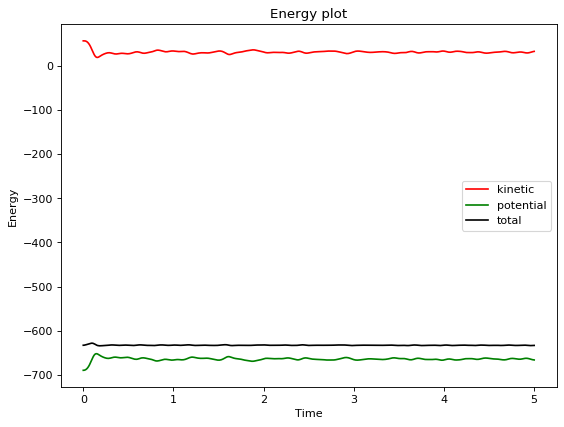

In [20]:
plot_energy("data3eii.energy")

Programmet ser riktig ut, atomene flyr ikke fra hverandre, de teleporterer når de kommer utenfor boksen, og den totale energien er bevart.

## 4 Science

### a) Temperature

#### i)

La til temperaturkalkulering i simulate funksjonen, lagret temperaturen til en fil og endret på plotte-funksjonen slik at den plotter temperatur:

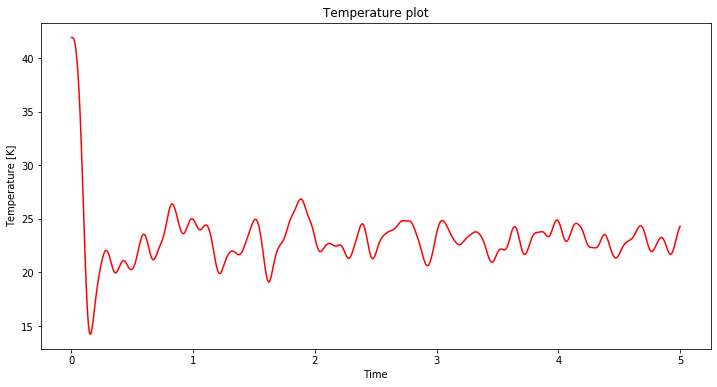

In [21]:
def simulate(atoms, dt, t_max, filename, update_func, L):
	# Declare variables and save atoms
	t_list = [0]
	pot_list = []
	kin_list = []
	tot_list = []
	tmp_list = []
	start_atoms = deep_copy(atoms)

	datafile = open("data/"+filename+".xyz", "w")

	start_time = time.time()
	while t_list[-1] < t_max:
		# Fancy progress indicator
		if int(t_list[-1]/dt) % t_max == 0:
			print(f"\r{t_list[-1]*100/t_max:.0f} %", end="")

		# Get and store energy
		pot, kin, tot = get_energy(atoms, L)
		pot_list.append(pot)
		kin_list.append(kin)
		tot_list.append(tot)

		# Calculate and store temperature
		temperature = (2/(3*len(atoms)))*kin
		tmp_list.append(temperature)

		step(atoms, dt, update_func, L, datafile)
		t_list.append(t_list[-1] + dt)
	print(f"\n{update_func:>7}: {time.time()- start_time:.3g} s")

	datafile.close()

	atoms = start_atoms
	return t_list[:-1], pot_list, kin_list, tot_list, tmp_list

def main(filename):
	dt = 0.01
	length = 5

	L, atoms = create_atoms(108, 1.7)

	t_list, pot_list, kin_list, tot_list, tmp_list = simulate(atoms, dt, length, filename, "verlet", L)
	with open("data/"+filename+".energy", "w") as outfile:
		for t, pot, kin, tot, temp in zip(t_list, pot_list, kin_list, tot_list, tmp_list):
			outfile.write(f"{t} {pot} {kin} {tot} {temp}\n")
# main("data4ai")
            
def plot_temp(energy_file):
    t_list, pot_list, kin_list, tot_list, tmp_list = [[] for i in range(5)]
    with open("data/"+energy_file, "r") as infile:
        for line in infile:
            t, pot, kin, tot, temp = (float(v) for v in line.split())
            t_list.append(t)
            pot_list.append(pot)
            kin_list.append(kin)
            tot_list.append(tot)
            tmp_list.append(temp*119.7)

    plt.figure(figsize=(12, 6))
    plt.plot(t_list, tmp_list, color="r", label="temperature")
    plt.title("Temperature plot")
    plt.ylabel("Temperature [K]")
    plt.xlabel("Time")
    plt.show()

plot_temp("data4ai.energy")

#### ii)

For å gjøre at atomene starter med en spesifik temperatur bruker vi np.random.normal(0, sqrt(T), size=(N,3)). Desverre bruker jeg pypy, så jeg må unngå å bruke numpy. Heldigvis har python sin innebygde random funksjon random.gauss, som fungerer på lignende måte. Endret create_atoms funksjonen slik at den tar inn en temperatur, og endret på main funksjonen slik at den gir en temperatur. Kjører så programmet og plotter temperaturen igjen:

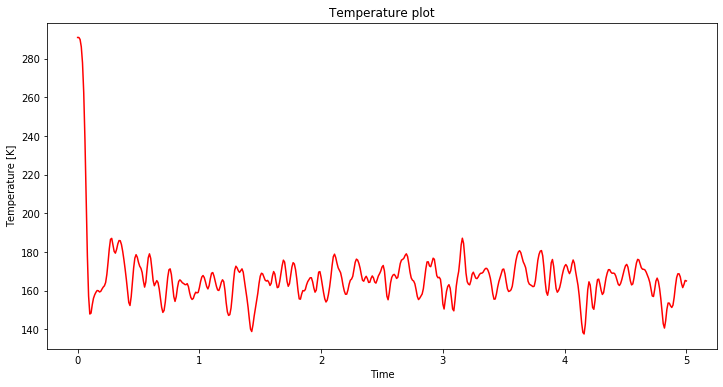

In [22]:
def main():
	dt = 0.01
	length = 5

	L, atoms = create_atoms(108, 1.7, 300)

	t_list, pot_list, kin_list, tot_list, tmp_list = simulate(atoms, dt, length, "verlet", L)
	with open("data/data4a2.energy", "w") as outfile:
		for t, pot, kin, tot, temp in zip(t_list, pot_list, kin_list, tot_list, tmp_list):
			outfile.write(f"{t} {pot} {kin} {tot} {temp}\n")


def create_atoms(atom_count, d, temperature):
	n = int((atom_count**(1/3))/(4**(1/3)))
	L = d*n
	atoms = []
	normal = lambda: random.gauss(0, math.sqrt(temperature/119.7))
	positions = box_positions(n, d)
	velocities = [Vector3(normal(), normal(), normal()) for i in range(atom_count)]
	for position, velocity in zip(positions, velocities):
		atoms.append(Atom(position, velocity))

	return L, atoms

plot_temp("data4aii.energy")

Kan se at temperaturen starter på 300 K, og så faller et stykke ned til en likevektstemperatur på ca. 166 kelvin.

#### iii)

For å finne startstemperaturen som fører til en likevektstemperatur på ca. 94.4 K kan man prøve ut verdier til det ser riktig ut. For å gjøre dette enklere la jeg til en kodelinje i plot_temp som printer likevektstemperaturen ved å ta gjennomsnittet av temperaturen etter midtpunktet:

In [23]:
def plot_temp(energy_file):
    t_list, pot_list, kin_list, tot_list, tmp_list = [[] for i in range(5)]
    with open("data/"+energy_file, "r") as infile:
        for line in infile:
            t, pot, kin, tot, temp = (float(v) for v in line.split())
            t_list.append(t)
            pot_list.append(pot)
            kin_list.append(kin)
            tot_list.append(tot)
            tmp_list.append(temp*119.7)
            
    print(f"Equilibrium ~{np.average(tmp_list[int(len(tmp_list)/2):]):.1f} Kelvin") # New

    plt.figure(figsize=(12, 6))
    plt.plot(t_list, tmp_list, color="r", label="temperature")
    plt.title("Temperature plot")
    plt.ylabel("Temperature [K]")
    plt.xlabel("Time")
    plt.show()

Ett problem med å finne en spesifik temperatur hvor likevektstemperatur en ca. 94.4 K er at det er stor variasjon i temperaturen. La til litt logikk som gjør at programmet skjøres 10 ganger, og bruker gjennomsnittsverdiene fra de 10 simulasjonene:

Equilibrium ~93.6 Kelvin


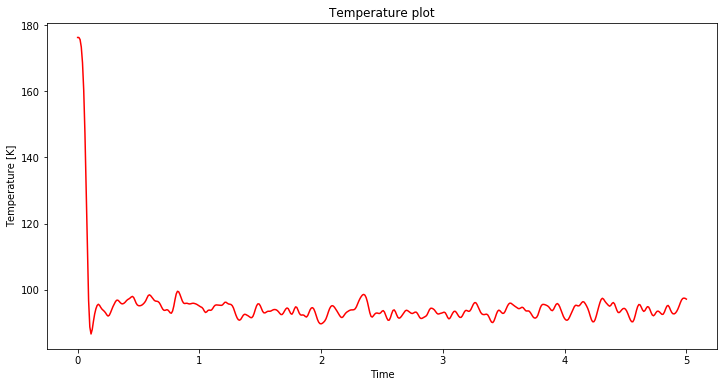

In [24]:
def simulate(atoms, dt, t_max, filename, update_func, L, completion, total_runs):
	t_list = [0]
	pot_list = []
	kin_list = []
	tot_list = []
	tmp_list = []
	start_atoms = deep_copy(atoms)

	datafile = open("data/"+filename+".xyz", "w")

	while t_list[-1] < t_max:
		# Fancy progress indicator, now more complicated
		if int(t_list[-1]/dt) % t_max == 0:
			print(f"\r{completion+1}/{total_runs} : {(100*completion + t_list[-1]*100/t_max)/total_runs:3.0f} %", end="")

		# Get and store energy
		pot, kin, tot = get_energy(atoms, L)
		pot_list.append(pot)
		kin_list.append(kin)
		tot_list.append(tot)

		# Calculate and store temperature
		temperature = (2/(3*len(atoms)))*kin
		tmp_list.append(temperature)

		step(atoms, dt, update_func, L, datafile)
		t_list.append(t_list[-1] + dt)

	datafile.close()

	atoms = start_atoms
	return t_list[:-1], pot_list, kin_list, tot_list, tmp_list

def main(filename, simulate_count):
	dt = 0.01
	length = 5

	sum_lists = [[0]*(int(length/dt)+1) for i in range(4)]

	start_time = time.time()
	for i in range(simulate_count):
		L, atoms = create_atoms(108, 1.7, 180)

		t_list, pot_list, kin_list, tot_list, tmp_list = simulate(atoms, dt, length, filename, "verlet", L, i, simulate_count)
		for i, (pot, kin, tot, temp) in enumerate(zip(pot_list, kin_list, tot_list, tmp_list)):
			sum_lists[0][i] += pot/simulate_count
			sum_lists[1][i] += kin/simulate_count
			sum_lists[2][i] += tot/simulate_count
			sum_lists[3][i] += temp/simulate_count
	print(f"\ntime: {time.time() - start_time:.3g}")

	with open("data/"+filename+".energy", "w") as outfile:
		for t, pot, kin, tot, temp in zip(t_list, *sum_lists):
			outfile.write(f"{t} {pot} {kin} {tot} {temp}\n")
#main("data4aiii", 10)
            
plot_temp("data4aiii.energy")

En starttemperatur på 180 fører til en likevektstemperatur på ca. 94.4 K.

### b) Velocity autocorrelation and diffusion coefficient

#### i)

Endret på simulate slik at den regner ut hastighetsautokorrelasjon, og endret på main slik at den også lagrer vac til en fil:

In [25]:
def simulate(atoms, dt, t_max, filename, update_func, L, completion, total_runs):
	# Declare variables and save atoms
	t_list = [0]
	pot_list = []
	kin_list = []
	tot_list = []
	tmp_list = []
	vac_list = []
	start_atoms = deep_copy(atoms)

	datafile = open("data/"+filename+".xyz", "w")

	while t_list[-1] < t_max:
		# Fancy progress indicator, now more complicated
		if int(t_list[-1]/dt) % t_max == 0:
			print(f"\r{completion+1}/{total_runs} : {(100*completion + t_list[-1]*100/t_max)/total_runs:3.0f} %", end="")

		# Get and store energy
		pot, kin, tot = get_energy(atoms, L)
		pot_list.append(pot)
		kin_list.append(kin)
		tot_list.append(tot)

		# Calculate and store temperature
		temperature = (2/(3*len(atoms)))*kin
		tmp_list.append(temperature)

		# Calculate and store velocity autocorrelation
		vac = 0
		for atom in atoms:                           # o   o o--o o       o
			vac_emum = atom.vel.dot(atom.vel0)       # |\  | |    |       |
			vac_denom = atom.vel0.get_length_sqrd()  # | \ | O-o  o   o   o 
			vac += vac_emum/vac_denom                # |  \| |     \ / \ / 
		vac = vac/len(atoms)                         # o   o o--o   o   o   
		vac_list.append(vac)

		step(atoms, dt, update_func, L, datafile)
		t_list.append(t_list[-1] + dt)

	datafile.close()

	atoms = start_atoms
	return t_list[:-1], pot_list, kin_list, tot_list, tmp_list, vac_list

def main(filename, simulate_count):
	dt = 0.01
	length = 5

	sum_lists = [[0]*(int(length/dt)+1) for i in range(5)]

	start_time = time.time()
	for i in range(simulate_count):
		L, atoms = create_atoms(256, 1.7, 180)

		t_list, pot_list, kin_list, tot_list, tmp_list, vac_list = simulate(atoms, dt, length, filename, "verlet", L, i, simulate_count)
		for i, (pot, kin, tot, temp, vac) in enumerate(zip(pot_list, kin_list, tot_list, tmp_list, vac_list)):
			sum_lists[0][i] += pot/simulate_count
			sum_lists[1][i] += kin/simulate_count
			sum_lists[2][i] += tot/simulate_count
			sum_lists[3][i] += temp/simulate_count
			sum_lists[4][i] += vac/simulate_count
	print(f"\ntime: {time.time() - start_time:.3g}")

	with open("data/"+filename+".energy", "w") as outfile:
		for t, pot, kin, tot, temp, vac in zip(t_list, *sum_lists):
			outfile.write(f"{t} {pot} {kin} {tot} {temp} {vac}\n")

#### ii)

Skjørte programmet med 256 atomer, endret på plottefunksjonen slik at den også plotter vac:

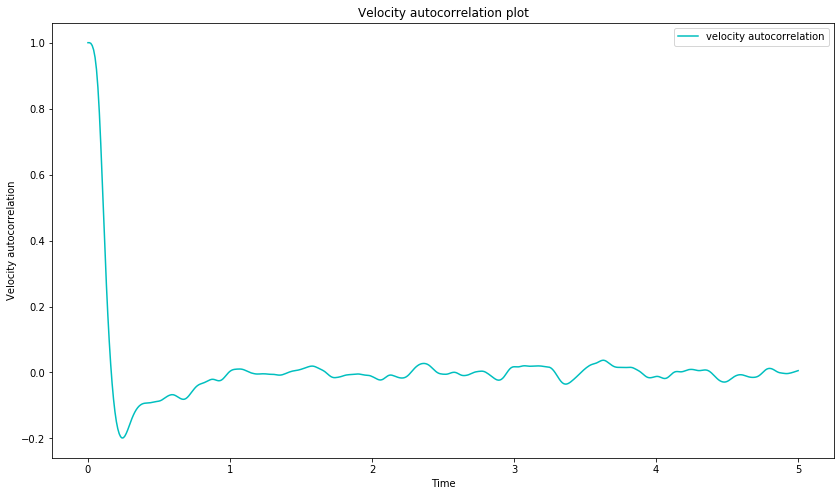

In [26]:
# main("data4bi", 10)

def plotinator(datafile, draw_list=["energy", "temp", "vac"], size=(10, 8)):
	t_list, pot_list, kin_list, tot_list, tmp_list, vac_list = [[] for i in range(6)]
	with open("data/"+datafile, "r") as infile:
		for line in infile:
			t, pot, kin, tot, *temp_vac = (float(v) for v in line.split())
			t_list.append(t)
			pot_list.append(pot)
			kin_list.append(kin)
			tot_list.append(tot)
			if len(temp_vac) == 2:
				vac_list.append(temp_vac[1])
			if len(temp_vac) > 0:
				tmp_list.append(temp_vac[0])

	data_list = {
		"energy": [[
			("kinetic", "r", kin_list),
			("potential", "g", pot_list),
			("total", "k", tot_list),
		], "Energy plot", "Time", "Energy"],
		"temp": [[
			("temperature", "r", tmp_list),
		], "Temperature plot", "Time", "Temperature [K]"],
		"vac": [[
			("velocity autocorrelation", "c", vac_list),
		], "Velocity autocorrelation plot", "Time", "Velocity autocorrelation"],
	}
	fig, axs = plt.subplots(len(draw_list), 1, figsize=(size[0], size[1]), sharex=True, gridspec_kw={'hspace': 0.2})
	if not hasattr(axs, "__getitem__"):
		axs = [axs]
	for i, type in enumerate(draw_list):
		data, title, xlabel, ylabel = data_list[type]
		for name, color, values in data:
			axs[i].plot(t_list, values, color=color, label=name)
		axs[i].set_title(title)
		axs[i].set_ylabel(ylabel)
		if i == len(draw_list)-1:
			axs[i].set_xlabel(xlabel)
	for ax in axs:
		ax.legend()

	plt.show()
    
plotinator("data4bi.energy", ["vac"], (14, 8))

#### iii)

Skrev en funksjon, create_equalibrium_atoms, som kjører simulasjonen en gang og returnerer atom-arrayet etter at simulasjonen har skjørt. Lagde også en foenklet simulasjonsfunksjon, ez_simulate. Gjorde òg at framgangsindikatoren til similate fungerer sammen med den nye framgangsindikatoren til ez_simulate:

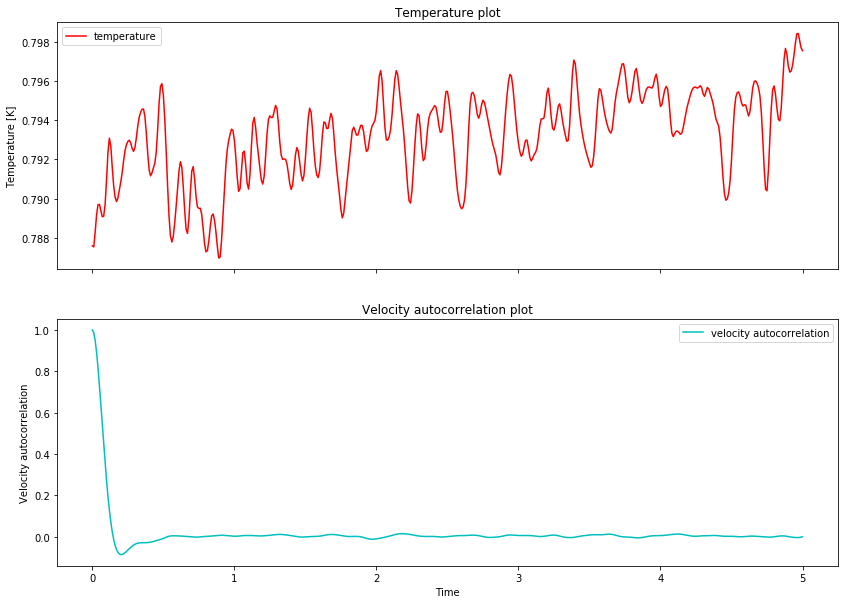

In [27]:
def simulate(atoms, dt, t_max, filename, update_func, L, completion, total_runs):
	# Declare variables and save atoms
	t_list = [0]
	pot_list = []
	kin_list = []
	tot_list = []
	tmp_list = []
	vac_list = []
	start_atoms = deep_copy(atoms)

	datafile = open("data/"+filename+".xyz", "w")

	while t_list[-1] < t_max:
		# Fancy progress indicator, now even more complicated
		if int(t_list[-1]/dt) % t_max == 0:
			print(f"\r{' '*7}{completion+1}/{total_runs} : {(100*completion + t_list[-1]*100/t_max)/total_runs:3.0f} %", end="")

		# Get and store energy
		pot, kin, tot = get_energy(atoms, L)
		pot_list.append(pot)
		kin_list.append(kin)
		tot_list.append(tot)

		# Calculate and store temperature
		temperature = (2/(3*len(atoms)))*kin
		tmp_list.append(temperature)

		# Calculate and store velocity autocorrelation
		vac = 0
		for atom in atoms:
			vac_emum = atom.vel.dot(atom.vel0)
			vac_denom = atom.vel0.get_length_sqrd()
			vac += vac_emum/vac_denom
		vac = vac/len(atoms)
		vac_list.append(vac)

		step(atoms, dt, update_func, L, datafile)
		t_list.append(t_list[-1] + dt)

	datafile.close()

	atoms = start_atoms
	return t_list[:-1], pot_list, kin_list, tot_list, tmp_list, vac_list

def ez_simulate(atoms, dt, t_max, update_func, L):
	# Declare variables and save atoms
	t_list = [0]

	datafile = open("data/null", "w")

	while t_list[-1] < t_max:
		# Fancy progress indicator
		if int(t_list[-1]*100/t_max) % t_max == 0:
			print(f"\r{'.'*int(t_list[-1]*6/t_max)}", end="")
		step(atoms, dt, update_func, L, datafile)
		t_list.append(t_list[-1] + dt)

	datafile.close()

	return atoms

def create_equalibrium_atoms(atom_count, d, temperature, dt, t_max, update_func):
	L, start_atoms = create_atoms(atom_count, d, temperature)
	warm_atoms = ez_simulate(start_atoms, dt, t_max, update_func, L)
	for atom in warm_atoms:
		atom.vel0 = atom.vel.copy()

	return L, warm_atoms

def main(filename, simulate_count):
	dt = 0.01
	length = 5

	sum_lists = [[0]*(int(length/dt)+1) for i in range(5)]

	start_time = time.time()
	for i in range(simulate_count):
		L, atoms = create_equalibrium_atoms(108, 1.7, 180, dt, length, "verlet")  # New

		t_list, pot_list, kin_list, tot_list, tmp_list, vac_list = simulate(atoms, dt, length, filename, "verlet", L, i, simulate_count)
		for i, (pot, kin, tot, temp, vac) in enumerate(zip(pot_list, kin_list, tot_list, tmp_list, vac_list)):
			sum_lists[0][i] += pot/simulate_count
			sum_lists[1][i] += kin/simulate_count
			sum_lists[2][i] += tot/simulate_count
			sum_lists[3][i] += temp/simulate_count
			sum_lists[4][i] += vac/simulate_count
	print(f"\ntime: {time.time() - start_time:.3g}")

	with open("data/"+filename+".energy", "w") as outfile:
		for t, pot, kin, tot, temp, vac in zip(t_list, *sum_lists):
			outfile.write(f"{t} {pot} {kin} {tot} {temp} {vac}\n")
            
# main("data4biii", 50)

plotinator("data4biii_test.energy", ["temp", "vac"], (14, 10))

Plottet også temperaturen for å se at systemet faktsik startet med en likevektstemperatur. vac-en ser lik ut, men den går litt mindre ned i minus og går opp til rundt 0 raskere.

#### iv)

Jeg har allerede lagdt til gjennomsnittssimuleringslogikk.

#### v)

Skrev et program som leser vac fra en datafil og regner ut diffusjonskoeffisienten. Truker np.trapz for integreringen.

In [28]:
def diffusio_calculo(filename):
	t_list, vac_list = [[] for i in range(2)]
	with open("data/"+filename, "r") as infile:
		for line in infile:
			t, *_, vac = (float(v) for v in line.split())
			t_list.append(t)
			vac_list.append(vac)
        
	I = np.trapz(vac_list, t_list)

	return (1/3)*I

print("Diffusion coefficient:", diffusio_calculo("data4biii.energy"))

Diffusion coefficient: 0.05303207721147


Koeffisienten er nå på dimensjonsløs form, for å konvertere til cm$^2$/s må man gange med: 
$$\frac{\left(3.405\cdot10^{-8} \text{ cm} \right)^2}{2.16 \cdot 10^{-12} \text{ s}} 
= 5.37\cdot10^{-4} \text{ cm}^2\text{/s}$$

Gjør koeffisienten til dimensjonell form:
$$0.053 \cdot 5.37 \cdot 10^{-4} = 2.85 \cdot 10^{-5} \text{ cm}^2\text{/s}$$

Resultatet i [1] var $2.4310 \cdot 10^{-5}$ cm$^2$/s, som er ganske nærme min verdi.

### c) Mean squared displacement and diffusion coefficient

La til kalkulering av gjennonsntilig kvadratisk forkyving i simulate funksjonen, og gjorde at Atom klassen tar vare på startpositionen, og at create_equalibrium_atoms opdaterer startpositionen til atomene. Jeg la også til at atomene har en teleports vektor, som teller hvor mange ganger den har krysset grensen (+1 hvis komponenten er større enn L, -1 hvis den er mindre enn 0). La også til en funksjon dist_traveled, som returnerer den totale avstanden atomet har bevegd seg.

In [29]:
class Atom:
	def __init__(self, pos, vel=None):
		self.force = Vector3()
		self.acc = Vector3()
		if vel is None:
			self.vel = Vector3()
		else:
			self.vel = vel
		self.vel0 = self.vel.copy()
		self.pos = pos
		self.pos0 = self.pos.copy()

		self.teleports = Vector3()

	def update(self, dt, L, func):
		# Update position and velocity
		self.update_verlet(dt)

		# Teleport if outside of box
		if self.pos.x > L:
			self.pos.x = self.pos.x - L
			self.teleports.x += 1
		elif self.pos.x < 0:
			self.pos.x = L - self.pos.x
			self.teleports.x -= 1

		if self.pos.y > L:
			self.pos.y = self.pos.y - L   # o   o o--o o       o
			self.teleports.y += 1         # |\  | |    |       |
		elif self.pos.y < 0:              # | \ | O-o  o   o   o 
			self.pos.y = L - self.pos.y   # |  \| |     \ / \ / 
			self.teleports.y -= 1         # o   o o--o   o   o   

		if self.pos.z > L:
			self.pos.z = self.pos.z - L
			self.teleports.z += 1
		elif self.pos.z < 0:
			self.pos.z = L - self.pos.z
			self.teleports.z -= 1

	def dist_traveled(self, L):
		return self.pos + self.teleports*L

	def update_verlet(self, dt):
		"""
		v[i] = v[i-1] + 0.5*(a[i-1] + a[i])*dt
		r[i+1] = v[i]*dt + 0.5*a[i]*dt^2
		"""
		acc_prev = self.acc
		acc = self.force
		self.vel += 0.5*(acc_prev + acc)*dt
		self.pos += self.vel*dt + 0.5*acc*dt**2
		self.acc = acc
		self.force = Vector3()

	def save_state(self, file):
		file.write(f"Ar {self.pos.x:f} {self.pos.y:f} {self.pos.z:f}\n")

	def length_to(self, atom):
		return (self.pos - atom.pos).length

	def copy(self):
		return Atom(self.pos.copy())

	def __repr__(self):
		return str(self.pos)
    
    
def create_equalibrium_atoms(atom_count, d, temperature, dt, t_max, update_func):
	L, start_atoms = create_atoms(atom_count, d, temperature)
	warm_atoms = ez_simulate(start_atoms, dt, t_max, update_func, L)
	for atom in warm_atoms:
		atom.vel0 = atom.vel.copy()
		atom.pos0 = atom.pos.copy()

	return L, warm_atoms

def simulate(atoms, dt, t_max, filename, update_func, L, completion, total_runs):
	# Declare variables and save atoms
	t_list = [0]
	pot_list = []
	kin_list = []
	tot_list = []
	tmp_list = []
	vac_list = []
	msd_list = []
	start_atoms = deep_copy(atoms)

	datafile = open("data/"+filename+".xyz", "w")

	while t_list[-1] < t_max:
		# Fancy progress indicator, now even more complicated
		if int(t_list[-1]/dt) % t_max == 0:
			print(f"\r{' '*7}{completion+1}/{total_runs} : {(100*completion + t_list[-1]*100/t_max)/total_runs:3.0f} %", end="")

		# Get and store energy
		pot, kin, tot = get_energy(atoms, L)
		pot_list.append(pot)
		kin_list.append(kin)
		tot_list.append(tot)

		# Calculate and store temperature
		temperature = (2/(3*len(atoms)))*kin
		tmp_list.append(temperature)

		# Calculate and store velocity autocorrelation
		vac = 0
		for atom in atoms:
			vac_emum = atom.vel.dot(atom.vel0)
			vac_denom = atom.vel0.get_length_sqrd()
			vac += vac_emum/vac_denom
		vac = vac/len(atoms)
		vac_list.append(vac)

		# Calculate and store mean squared displacement
		msd = sum((atom.dist_traveled(L) - atom.pos0).get_length_sqrd() for atom in atoms)/len(atoms) # o   o o--o o       o
		msd_list.append(msd)                                                                          # |\  | |    |       |
                                                                                                      # | \ | O-o  o   o   o 
		step(atoms, dt, update_func, L, datafile)                                                     # |  \| |     \ / \ / 
		t_list.append(t_list[-1] + dt)                                                                # o   o o--o   o   o   

	datafile.close()

	atoms = start_atoms
	return t_list[:-1], pot_list, kin_list, tot_list, tmp_list, vac_list, msd_list

def main(filename, simulate_count):
	dt = 0.01
	length = 5

	sum_lists = [[0]*(int(length/dt)+1) for i in range(6)]

	start_time = time.time()
	for i in range(simulate_count):
		L, atoms = create_equalibrium_atoms(108, 1.7, 180, dt, length, "verlet")

		list_list = simulate(atoms, dt, length, filename, "verlet", L, i, simulate_count)
		t_list, pot_list, kin_list, tot_list, tmp_list, vac_list, msd_list = list_list
		for i, (pot, kin, tot, temp, vac, msd) in enumerate(zip(pot_list, kin_list, tot_list, tmp_list, vac_list, msd_list)):
			sum_lists[0][i] += pot/simulate_count
			sum_lists[1][i] += kin/simulate_count
			sum_lists[2][i] += tot/simulate_count
			sum_lists[3][i] += temp/simulate_count
			sum_lists[4][i] += vac/simulate_count
			sum_lists[5][i] += msd/simulate_count
	print(f"\ntime: {time.time() - start_time:.3g}")

	with open("data/"+filename+".energy", "w") as outfile:
		for t, pot, kin, tot, temp, vac, msd in zip(t_list, *sum_lists):
			outfile.write(f"{t} {pot} {kin} {tot} {temp} {vac} {msd}\n")

Ettersom $\left< r^2(t)\right> = 6Dt$  (når $t \rightarrow \infty$), er $\frac{d\left< r^2(t)\right>}{dt} = 6D \implies D=\frac{1}{6}\frac{d \left< r^2(t)\right>}{dt}$. Skrev et program som regner ut den deriverte:

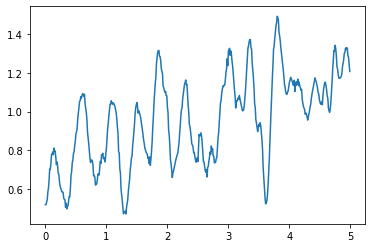

Diffusion coefficient: 0.15911672965290571


In [30]:
def more_diffusio_calculo(filename):
    # Get data
	t_list, msd_list = [[] for i in range(2)]
	with open("data/"+filename, "r") as infile:
		for line in infile:
			t, *_, msd = (float(v) for v in line.split())
			t_list.append(t)
			msd_list.append(msd)

	# Find derivative
	diff_list = []
	for i in range(len(t_list)-1):
		diff_list.append((msd_list[i+1] - msd_list[i])/(t_list[i+1]-t_list[i]))
        
    # Plot derivative for visualization of D
	plt.plot(t_list[:-1], np.array(diff_list))d
	plt.show()
        
    # Return average as D
	return np.average(diff_list)/6

print("Diffusion coefficient:", more_diffusio_calculo("data4ci.energy"))

En kan se at den deriverte ikke er spesielt konstant, den varierer en del, og varierer ikke rundt en spesiell verdi. Det er jo slik at $D=\frac{1}{6}\frac{d<r^2(t)>}{dt}$ egentlig er en grenseverdi når t går mot uendelig. Hvis man bare tar gjennomsnittet av alle D-verdiene får man 0.159, gir en verdi på:
$$ $$
$$0.159 \cdot 5.37 \cdot 10^{-4} = 8.54 \cdot 10^{-5}$$
$$ $$
Som er ganske langt unna $2.4310 \cdot 10^{-5}$. Dette er nok fordi at jeg simulerer med så få atomer, men å skjøre programmet med 864 atomer mange nok ganger til at man får et fint gjennomsnitt kan raskt ta flere timer. Jeg bestemte meg derfor for å skrive om programmet til c++:

Header fil med includes og atom klassen:

```c++
#include <iostream>
#include <fstream>
#include <chrono>
#include <string>
#include <random>
#include <cmath>
#include <tuple>
#include <list>
#include <vector>
#include <valarray>
#include <glm/vec3.hpp>
#include <glm/geometric.hpp>
#include <omp.h>
#include <mutex>

using namespace std;
using vec3 = glm::vec<3, double>;

class Atom {
	public:
		vec3 force;
		vec3 acc;
		vec3 vel;
		vec3 vel0;
		vec3 pos;
		vec3 pos0;
		vec3 teleports;
		Atom(vec3 pos, vec3 vel=vec3 {0, 0, 0}) {
			this->pos = pos;
			this->pos0 = pos;
			this->vel = vel;
			this->vel0 = vel;
			this->force = (vec3) {0, 0, 0};
			this->acc = (vec3) {0, 0, 0};
			this->teleports = (vec3) {0, 0, 0};
		}

		void update(double dt, double L) {
			// Update position and velocity
			update_verlet(dt);

			// Teleport if outside of box
			if (pos.x > L) {
				pos.x = pos.x - L;
				teleports.x += 1;
			} else if (pos.x < 0) {
				pos.x = L - pos.x;
				teleports.x -= 1;
			}

			if (pos.y > L) {
				pos.y = pos.y - L;
				teleports.y += 1;
			} else if (pos.y < 0) {
				pos.y = L - pos.y;
				teleports.y -= 1;
			}

			if (pos.z > L) {
				pos.z = pos.z - L;
				teleports.z += 1;
			} else if (pos.z < 0) {
				pos.z = L - pos.z;
				teleports.z -= 1;
			}
		}

		void update_verlet(double dt) {
			vec3 acc_prev = acc;
			acc = force;
			vel += 0.5*(acc_prev + acc)*dt;
			pos += vel*dt + ((double) 0.5)*acc*pow(dt, 2);
			force = (vec3) {0, 0, 0};
		}

		vec3 dist_traveled(double L) {
			return pos + teleports*L;
		}

		void save_state(FILE *file) {
			fprintf(file, "Ar %f %f %f\n", pos.x, pos.y, pos.z);
		}
};

double get_time();
void printray(vec3 ray);
double get_length_sqrd(vec3 ray);

void get_atom_combinations(vector<vector<Atom*>> &combinations, vector<Atom> &atoms);
double U(double r_sqrd);
vec3 get_force(vec3 &between_vec, double r_sqrd);
tuple<vec3, double> periodic_boundry(vec3 &between_ray, double L);
tuple<double, double, double> get_energy(vector<Atom> &atoms, vector<vector<Atom*>> &atom_combinations, double L);

void ez_simulate(vector<Atom> &atoms, vector<vector<Atom*>> &atom_combinations, double dt, double t_max, double L);
tuple<vector<double>, vector<double>, vector<double>, vector<double>, vector<double>, vector<double>, vector<double>> simulate(
	vector<Atom> &atoms, vector<vector<Atom*>> &atom_combinations, double dt, double t_max, string filename, double L, 
    int completion, int total_runs
);
void step(vector<Atom> &atoms, vector<vector<Atom*>> &atom_combinations, double dt, double L, FILE *datafile);
vector<vec3> box_positions(int n, double d);
tuple<double, vector<Atom>, vector<vector<Atom*>>> create_atoms(int atom_count, double d, double temperature);
tuple<double, vector<Atom>, vector<vector<Atom*>>> create_equalibrium_atoms(int atom_count, double d, double temperature, double dt, double t_max);
```

Som forventet skjører c++ versjonen mye raksere, når det er kompilert med de riktige argumentene (-O3 -march=native -fopenmp -ffast-math), skjører det 120 ganger raskere enn pypy, som vil si $1200$ ganger raskere enn python versjonen. \
Brukte det for å kjøre en simmulering med 864 atomer 200 ganger. Skjørte more_diffusio_calculo med den nye dataen:

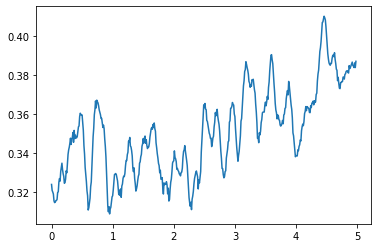

0.05841723446893788

In [31]:
more_diffusio_calculo("data4ci_cpp.energy")

Selv med 200 simuleringer er ikke den deriverte spesielt uniform, men når man renger ut D, får man
$$ $$
$$0.0584 \cdot 5.37 \cdot 10^{-4} = 3.14 \cdot 10^{-5}$$
$$ $$
Som er mye nærmere $2.4310 \cdot 10^{-5}$. Det er likevel slik at resultatet fra denne oppgaven er lengere unna svaret enn resultatet fra oppgave 4b, men det er mulig at resultatet fra 4b egentlig var ganske unyaktig, men bare endte opp i nærheten av den forventede verdien.

#### iii)

Ettersom jeg brukte så lang tid på å skrive om programmet til c++ for forrige oppgave, er det ikke noe problem å kjøre simuleringen for mange temperaturer. Må først finne hvilke startverdier som passer til hvilke likevektstemperaturer, og så kjøre programmet mange ganger for hver likevektstemperatur, og skrive D(T) til en fil: